# Random Forest Détecteur de faux billets 

## 1 Préparation du fichier
### 1.1 Importation des librairies

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import joblib

### 1.2 Importation du modèle

In [2]:
# modèle Random Forest entraîné et sauvegardé
rf_model = joblib.load('random_forest_billets.pkl')

## 2 Fichier test

In [3]:
# nouveau fichier avec d'autres billets
df_test = pd.read_csv('billets_production.csv')

In [4]:
# afficher les premières lignes
df_test.head()

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


In [5]:
#Le nombre de valeurs présentes dans chacune des colonnes
print("Nombre de Valeurs présentes dans chacune des colonnes")
print(df_test.count())

Nombre de Valeurs présentes dans chacune des colonnes
diagonal        5
height_left     5
height_right    5
margin_low      5
margin_up       5
length          5
id              5
dtype: int64


## 3 Prédiction

In [6]:
# Prédiction 
X_test = df_test.drop(columns=['id'])
pred = rf_model.predict(X_test)

In [7]:
# Ajouter la prédiction à la table
df_test['prediction'] = pred
print(df_test[['prediction']].value_counts())

prediction
False         3
True          2
Name: count, dtype: int64


## 4 Visualisation

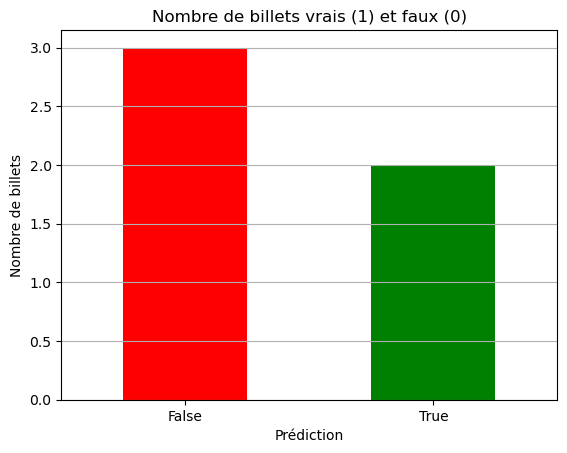

In [8]:
# Afficher le nombre de vrais (1) et faux (0) billets
df_test['prediction'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.title("Nombre de billets vrais et faux ")
plt.xlabel("Prédiction")
plt.ylabel("Nombre de billets")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [9]:
# Filtrer les billets prédits comme faux
billets_faux = df_test[df_test['prediction'] == 0]

# Afficher les ID
print("🧾 ID des billets FAUX détectés :")
print(billets_faux['id'].values)

🧾 ID des billets FAUX détectés :
['A_1' 'A_2' 'A_3']
